In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("./Dataset/online_retail_II.xlsx",parse_dates=['InvoiceDate'])
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)

In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# Data Quality Analysis

In [7]:
df.describe()

,Quantity,InvoiceDate,Price,CustomerID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


- Ada Quantity dan Price yang negative
- Ada banyak CustomerID yang missing
- Ada quantity hingga ribuan

<Axes: >

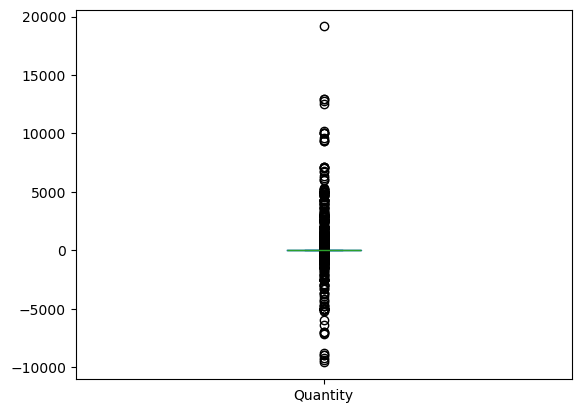

In [9]:
df['Quantity'].plot(kind='box')

In [11]:
df[df['Quantity']<0].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
379578,C525957,85160B,BLACK BIRD GARDEN DESIGN MUG,-2,2010-10-07 19:31:00,1.25,17726.0,United Kingdom
119361,C500798,22197,SMALL POPCORN HOLDER,-2,2010-03-10 10:57:00,0.85,14156.0,EIRE
407257,C528380,22854,CREAM SWEETHEART EGG HOLDER,-1,2010-10-21 17:49:00,4.95,14499.0,United Kingdom
504919,C536548,22168,ORGANISER WOOD ANTIQUE WHITE,-2,2010-12-01 14:33:00,8.50,12472.0,Germany
186061,C507118,22352,LUNCH BOX WITH CUTLERY RETROSPOT,-1,2010-05-06 11:38:00,2.10,15311.0,United Kingdom
53957,C494372,22187,GREEN CHRISTMAS TREE CARD HOLDER,-1,2010-01-13 16:27:00,4.25,15719.0,United Kingdom
197101,C508242,22169,FAMILY ALBUM WHITE PICTURE FRAME,-2,2010-05-13 19:59:00,7.65,13842.0,United Kingdom
81662,496884,44276,NaN,-4,2010-02-04 14:14:00,0.00,NaN,United Kingdom
424963,C529999,M,Manual,-1,2010-11-01 09:11:00,1435.29,NaN,RSA
191669,C507599,22057,CERAMIC PLATE STRAWBERRY DESIGN,-3,2010-05-10 13:26:00,1.49,13136.0,United Kingdom


Quantity Negative terjadi pada :
- Invoice yang depannya C, yang berarti cancelled
- Invoice tanpa CustomerID

In [13]:
df.sort_values('Quantity').tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.1,13902.0,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.1,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.1,13902.0,Denmark


In [13]:
df.query('Quantity>0')['Quantity'].describe(percentiles=[0.5,0.8,0.9,0.95,0.99,0.999])

count    513135.000000
mean         11.715412
std          92.974635
min           1.000000
50%           3.000000
80%          12.000000
90%          24.000000
95%          32.000000
99%         120.000000
99.9%       576.000000
max       19152.000000
Name: Quantity, dtype: float64

Bahkan top 99.9% transaksi adalah 50 item. Ratusan item disini lumayan mencurigakan dan akan kita exclude di analysis nantinya

In [15]:
df.sort_values('Price').tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom


Description Manual menunjukkan transaksi yang bukan belanja

In [19]:
df.query('Quantity>0').sort_values('Price').tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
342147,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom
135015,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom


CustomerID null menunjukkan transaksi selain pembelian, lebih baik nantinya kita buang dari data

In [17]:
drop_stock_code = ['POST','DOT','ADJUST','ADJUST2','M','B','AMAZONFEE']
df[~df['StockCode'].isin(drop_stock_code)].dropna(subset=['CustomerID']).query('Quantity>0').sort_values('Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
453705,532470,22624,IVORY KITCHEN SCALES,2,2010-11-12 11:41:00,0.0,12647.0,Germany
512240,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
327801,521375,22202,MILK PAN PINK RETROSPOT,3,2010-09-05 11:58:00,0.0,12647.0,Germany
...,...,...,...,...,...,...,...,...
368234,525022,22655,VINTAGE RED KITCHEN CABINET,1,2010-10-03 12:00:00,295.0,17412.0,United Kingdom
291647,517766,22656,VINTAGE BLUE KITCHEN CABINET,1,2010-08-02 11:25:00,295.0,14427.0,United Kingdom
268526,515349,22655,VINTAGE RED KITCHEN CABINET,1,2010-07-12 10:43:00,295.0,15513.0,United Kingdom
292603,517909,22655,VINTAGE RED KITCHEN CABINET,1,2010-08-03 10:26:00,295.0,18260.0,United Kingdom


# Data Cleansing

In [19]:
df.dropna(subset=['CustomerID'],inplace=True) # Membuang CustomerID yang null

df = df[df['Quantity']<=df['Quantity'].quantile(0.99)] # Membuang Quantity yang terlalu ekstrim

df = df[df['Invoice'].str[0]!="C"] # Membuang invoice yang batal

df = df[df['Quantity']>0] # Mengambil quantity yang tag negative
df = df[~df['StockCode'].isin(drop_stock_code)] # Membuang beberapa code yang tidak terkait belanja
df['total_payment'] = df['Quantity']*df['Price']

# EDA

In [21]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_payment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [23]:
df.groupby('Country').agg({'Invoice':'nunique','total_payment':'sum','CustomerID':'nunique'}).sort_values('Invoice',ascending=False)

,Invoice,total_payment,CustomerID
Country,,,
United Kingdom,17199,6344379.483,3928
Germany,323,178222.671,67
EIRE,280,259737.870,3
France,224,115353.290,46
Netherlands,120,163354.700,22
Sweden,63,32220.670,16
Spain,57,26356.000,21
Belgium,46,20395.430,16
Portugal,38,21380.090,17


In [25]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_payment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [27]:
df['InvoiceTimeStamp'] = df['InvoiceDate'].copy()
df['InvoiceDate'] = df['InvoiceDate'].dt.normalize() # Mereset jam

<Axes: xlabel='InvoiceDate'>

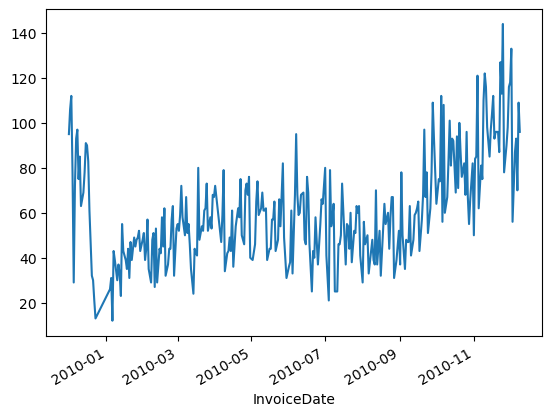

In [29]:
df.groupby('InvoiceDate')['Invoice'].nunique().plot()

<Axes: xlabel='InvoiceDate'>

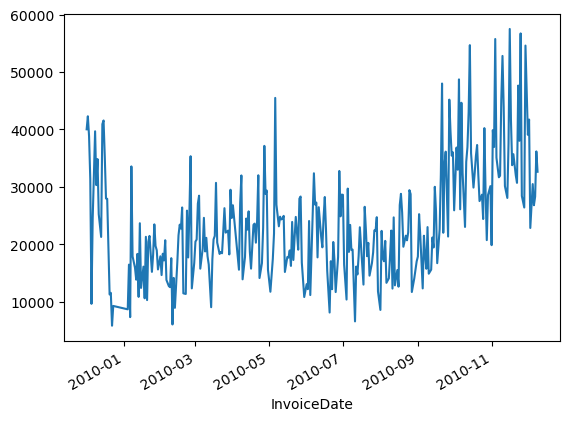

In [31]:
df.groupby('InvoiceDate')['total_payment'].sum().plot()

Pertanyaan yang harus dijawab :
- Apakah kita melakukan RFM segmentation ke seluruh customer? Apakah segmentasi perlu dibedakan antar negara?

In [33]:
# Mari fokus ke customer dari United Kingdom saja
df = df[df['Country']=='United Kingdom']

# Melakukan Analysis RFM

# Recency Calculation

In [35]:
df.sort_values('InvoiceDate').groupby('CustomerID').tail(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_payment,InvoiceTimeStamp
1310,489561,84029C,BROWN FURRY HOT WATER BOTTLE,7,2009-12-01,3.75,14654.0,United Kingdom,26.25,2009-12-01 12:57:00
2869,489635,47566,PARTY BUNTING,5,2009-12-01,4.65,16763.0,United Kingdom,23.25,2009-12-01 15:26:00
259,489462,90003B,ROSE COLOUR PAIR HEART HAIR SLIDES,3,2009-12-01,3.75,17592.0,United Kingdom,11.25,2009-12-01 10:49:00
1258,489560,17165D,ASS COL LARGE SAND FROG P'WEIGHT,108,2009-12-01,0.85,13526.0,United Kingdom,91.80,2009-12-01 12:56:00
1249,489559,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2009-12-01,4.95,17056.0,United Kingdom,9.90,2009-12-01 12:55:00
...,...,...,...,...,...,...,...,...,...,...
523540,538067,22899,CHILDREN'S APRON DOLLY GIRL,4,2010-12-09,2.10,15288.0,United Kingdom,8.40,2010-12-09 13:59:00
523263,538037,20974,12 PENCILS SMALL TUBE SKULL,24,2010-12-09,0.65,17430.0,United Kingdom,15.60,2010-12-09 13:05:00
523271,538040,21930,JUMBO STORAGE BAG SKULLS,1,2010-12-09,1.95,16520.0,United Kingdom,1.95,2010-12-09 13:08:00
523256,538035,21429,RED GINGHAM ROSE JEWELLERY BOX,2,2010-12-09,1.65,16065.0,United Kingdom,3.30,2010-12-09 13:03:00


In [37]:
# Recency
latest_date = df['InvoiceDate'].max()
latest_trx_per_customer = df.sort_values('InvoiceDate').groupby('CustomerID').tail(1)
latest_trx_per_customer['days_to_today'] = latest_date - latest_trx_per_customer['InvoiceDate']
latest_trx_per_customer['days_to_today']

1310     373 days
2869     373 days
259      373 days
1258     373 days
1249     373 days
           ...   
523540     0 days
523263     0 days
523271     0 days
523256     0 days
525460     0 days
Name: days_to_today, Length: 3928, dtype: timedelta64[ns]

In [39]:
latest_trx_per_customer['days_to_today'] = latest_trx_per_customer['days_to_today'].dt.days # mengubah timedelta menjadi integer

<Axes: ylabel='Frequency'>

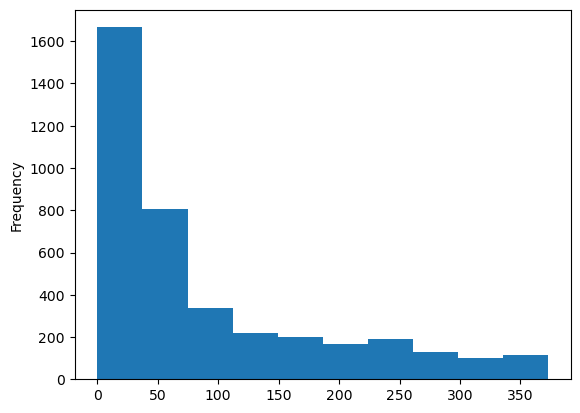

In [41]:
df_recency = latest_trx_per_customer[['CustomerID','days_to_today']]
df_recency['days_to_today'].plot(kind='hist')

In [43]:
df_recency['R_score'] = pd.qcut(df_recency['days_to_today'],3,labels=['Recent','Normal','Long'])

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_8419/800076479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['R_score'] = pd.qcut(df_recency['days_to_today'],3,labels=['Recent','Normal','Long'])


In [45]:
df_recency

,CustomerID,days_to_today,R_score
1310,14654.0,373,Long
2869,16763.0,373,Long
259,17592.0,373,Long
1258,13526.0,373,Long
1249,17056.0,373,Long
...,...,...,...
523540,15288.0,0,Recent
523263,17430.0,0,Recent
523271,16520.0,0,Recent
523256,16065.0,0,Recent


In [47]:
df_recency.groupby('R_score').agg({'days_to_today':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_8419/4087202550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_recency.groupby('R_score').agg({'days_to_today':['min','max','mean','median','count']})


days_to_today                              
                  min  max        mean median count
R_score                                            
Recent              0   27   11.670395   11.0  1341
Normal             28   87   52.498045   52.0  1279
Long               88  373  207.323394  198.5  1308

# Volume Calculation

<Axes: ylabel='Frequency'>

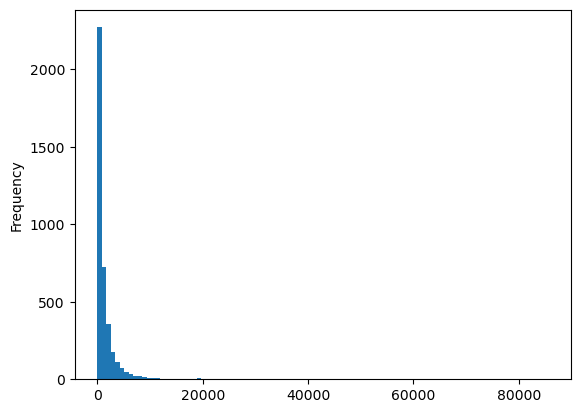

In [49]:
df_volume = df.groupby('CustomerID').agg({'total_payment':'sum'})
df_volume['total_payment'].plot(kind='hist',bins=100)


In [51]:
df_volume['V_score'] = pd.qcut(df_volume['total_payment'],3,labels=['Low','Medium','High'])

In [53]:
df_volume

,total_payment,V_score
CustomerID,,
12346.0,372.86,Low
12608.0,415.79,Medium
12745.0,723.85,Medium
12746.0,254.55,Low
12747.0,5080.53,High
...,...,...
18283.0,641.77,Medium
18284.0,461.68,Medium
18285.0,427.00,Medium


In [55]:
df_volume.groupby('V_score').agg({'total_payment':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_8419/2296053504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_volume.groupby('V_score').agg({'total_payment':['min','max','mean','median','count']})


total_payment                                      
                  min       max         mean   median count
V_score                                                    
Low              0.00    382.81   211.739428   209.53  1310
Medium         382.94   1192.20   700.861882   658.10  1308
High          1192.94  85575.71  3931.506481  2312.71  1310

# Frequency

<Axes: ylabel='Frequency'>

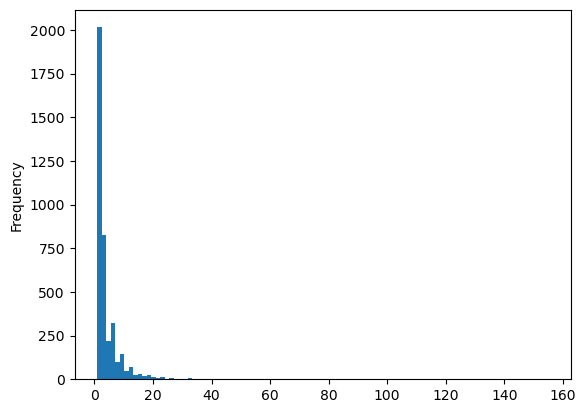

In [57]:
df_frequency = df.groupby('CustomerID').agg({'Invoice':'nunique'})
df_frequency['Invoice'].plot(kind='hist',bins=100)

In [59]:
df_frequency['F_score'] = pd.qcut(df_frequency['Invoice'],3,labels=['Low','Medium','High'])

In [61]:
df_frequency.groupby('F_score').agg({'Invoice':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_8419/3995854452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_frequency.groupby('F_score').agg({'Invoice':['min','max','mean','median','count']})


Invoice                             
            min  max       mean median count
F_score                                     
Low           1    2   1.355831    1.0  2015
Medium        3    4   3.423544    3.0   824
High          5  155  10.694215    8.0  1089

In [63]:
import numpy as np
df_frequency['F_score'] = pd.cut(df_frequency['Invoice'],bins=[0,5,25,np.Inf],labels=['Low','Medium','High'],right=True)

In [65]:
df_frequency['F_score'].value_counts()

F_score
Low       3056
Medium     820
High        52
Name: count, dtype: int64

In [67]:
df_frequency.groupby('F_score').agg({'Invoice':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_8419/3995854452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_frequency.groupby('F_score').agg({'Invoice':['min','max','mean','median','count']})


Invoice                             
            min  max       mean median count
F_score                                     
Low           1    5   2.172120    2.0  3056
Medium        6   25   9.787805    8.0   820
High         26  155  48.750000   39.0    52

# Penggabungan ketiga komponen

In [69]:
df_frequency.head(2)

,Invoice,F_score
CustomerID,,
12346.0,11,Medium
12608.0,1,Low


In [71]:
df_recency.head(2)

,CustomerID,days_to_today,R_score
1310,14654.0,373,Long
2869,16763.0,373,Long


In [73]:
df_volume.head(2)

,total_payment,V_score
CustomerID,,
12346.0,372.86,Low
12608.0,415.79,Medium


In [75]:
df_recency.set_index('CustomerID')['R_score']

CustomerID
14654.0      Long
16763.0      Long
17592.0      Long
13526.0      Long
17056.0      Long
            ...  
15288.0    Recent
17430.0    Recent
16520.0    Recent
16065.0    Recent
17530.0    Recent
Name: R_score, Length: 3928, dtype: category
Categories (3, object): ['Recent' < 'Normal' < 'Long']

In [77]:
recency = df_recency.set_index('CustomerID')['R_score']
volume = df_volume['V_score']
frequency = df_frequency['F_score']

In [79]:
df_rfm = pd.concat([recency,volume,frequency],axis=1)

In [81]:
df_rfm

,R_score,V_score,F_score
CustomerID,,,
14654.0,Long,Low,Low
16763.0,Long,Low,Low
17592.0,Long,Low,Low
13526.0,Long,Medium,Low
17056.0,Long,Low,Low
...,...,...,...
15288.0,Recent,High,Medium
17430.0,Recent,Medium,Low
16520.0,Recent,High,Low


Contoh pembagian berdasarkan RFM Analysis
1. High value Customers
2. Mid value Customers
3. Low value Customers
4. Dormant Customers

Contoh lain pembagian RFM :
- Top Customer (customers with high scores for all three parameters)
- Newcomers (customers with high recency but low frequency and monetary scores)
- at-risk customers (customers with low scores for all three parameters)

In [83]:
df_rfm.value_counts()

R_score  V_score  F_score
Long     Low      Low        731
Recent   High     Medium     511
Normal   Medium   Low        482
Long     Medium   Low        393
Recent   Medium   Low        369
Normal   Low      Low        355
         High     Low        226
Recent   Low      Low        219
Normal   High     Medium     192
Recent   High     Low        160
Long     High     Low        121
Recent   High     High        49
Long     High     Medium      48
Recent   Medium   Medium      33
Normal   Medium   Medium      22
Long     Medium   Medium       9
         Low      Medium       4
         High     High         2
Normal   Low      Medium       1
         High     High         1
Name: count, dtype: int64

# Challenge

Tim marketing ingin "membangkitkan" customer customer yang "Big dormant".

Big dormant adalah customer dengan : 
- R_score : Long
- V_score : Medium or High
- F_score : Medium or High  
Jika V_score dan F_score keduanya Medium maka tidak termasuk ke kategori "Big Dormant"  

Jika campaign yang mereka buat sukses membuat customer "Big dormant" ber transaksi seperti biasa, berapa total transaksi yang akan dihasilkan selama 1 bulan kedepan.